In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# For Visualization
import matplotlib as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=2)
% matplotlib inline

# Resize the size of plots
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import Dataset
poll = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/2016-general-election-trump-vs-clinton.csv")
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [3]:
# Drop various colums from data as we dont need them
poll = poll.drop(['Pollster URL','Source URL','Partisan','Question Text','Question Iteration'],axis=1)
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Affiliation
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,None
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,None
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,None
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,None
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,None


In [4]:
# Glimpse of data
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Affiliation             1522 non-null   object 
dtypes: float64(5), object(7)
memory usage: 142.8+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


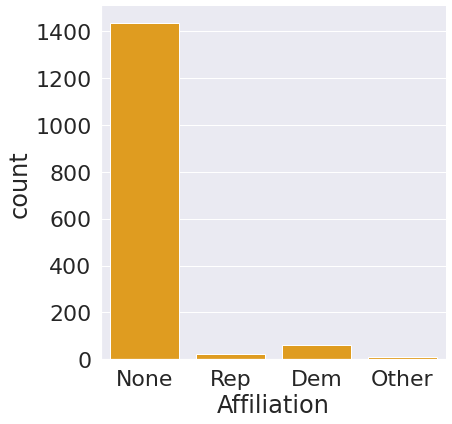

In [7]:
# Quick visualization overview of the affiliation for the polls
sns.factorplot('Affiliation',data=poll,kind='count',legend=True,color='orange',size=6)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


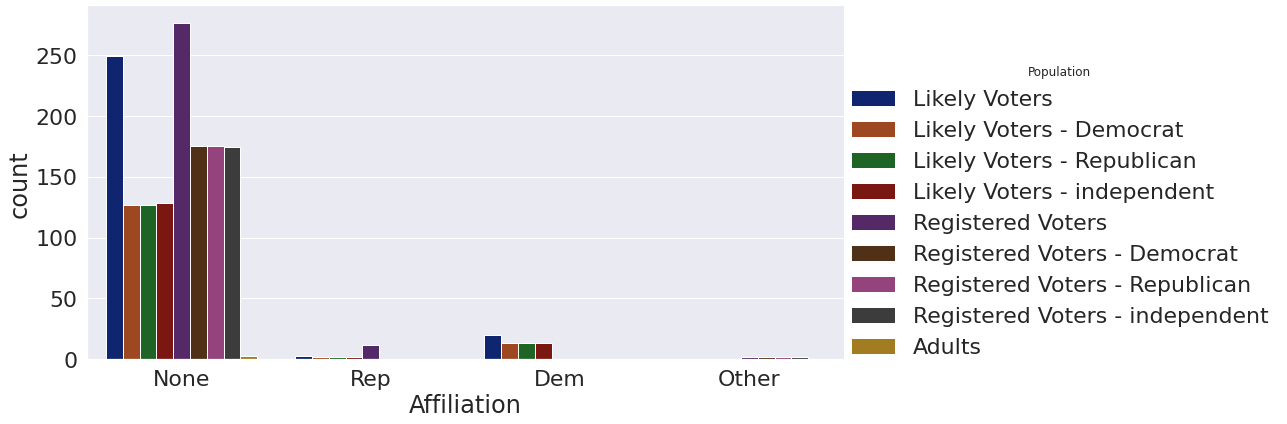

In [8]:
sns.factorplot('Affiliation',data=poll,kind='count',legend=True,hue='Population',size=6,aspect=2,palette='dark')

In [9]:
# Averages of different candidates

average=pd.DataFrame(poll.mean())
average.drop('Number of Observations',inplace=True)
average

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [10]:
# Standard Deviation to get the error

std=pd.DataFrame(poll.std())
std.drop('Number of Observations',inplace=True)
std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


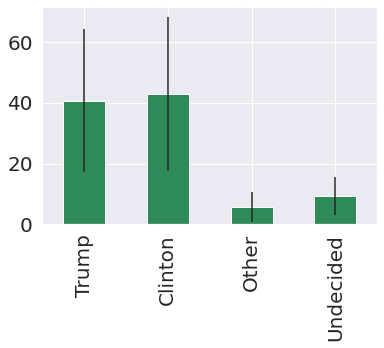

In [11]:
average.plot(yerr=std,kind='bar',legend=False,color='seagreen',fontsize=20)

In [12]:
# Consider undecided factor

poll_avg=pd.concat([average,std],axis=1)
poll_avg.column=['Average','STD']
poll_avg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,0,0
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


The polls indicate a fairly close race, but what about the undecided voters?

Most of them will likely vote for one of the candidates once the election occurs.

Split the undecided evenly between the two candidates.

# Time series plot of favour of voters against time
poll.plot(x='End Date',y=['Trump','Clinton','Other','Undecided'],linestyle='',marker='s').legend(bbox_to_anchor=(1.5, 1))

In [16]:
# Plot out the difference between Tump and Clinton and how it changes as time moves along
from datetime import datetime

poll['Difference']=(poll.Trump-poll.Clinton)/100
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Affiliation,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,None,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,None,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,None,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,None,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,None,0.02


In [17]:
# Visualize how this sentiment in difference changes over time

poll=poll.groupby('Start Date',as_index=False).mean()
poll.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,-0.1425


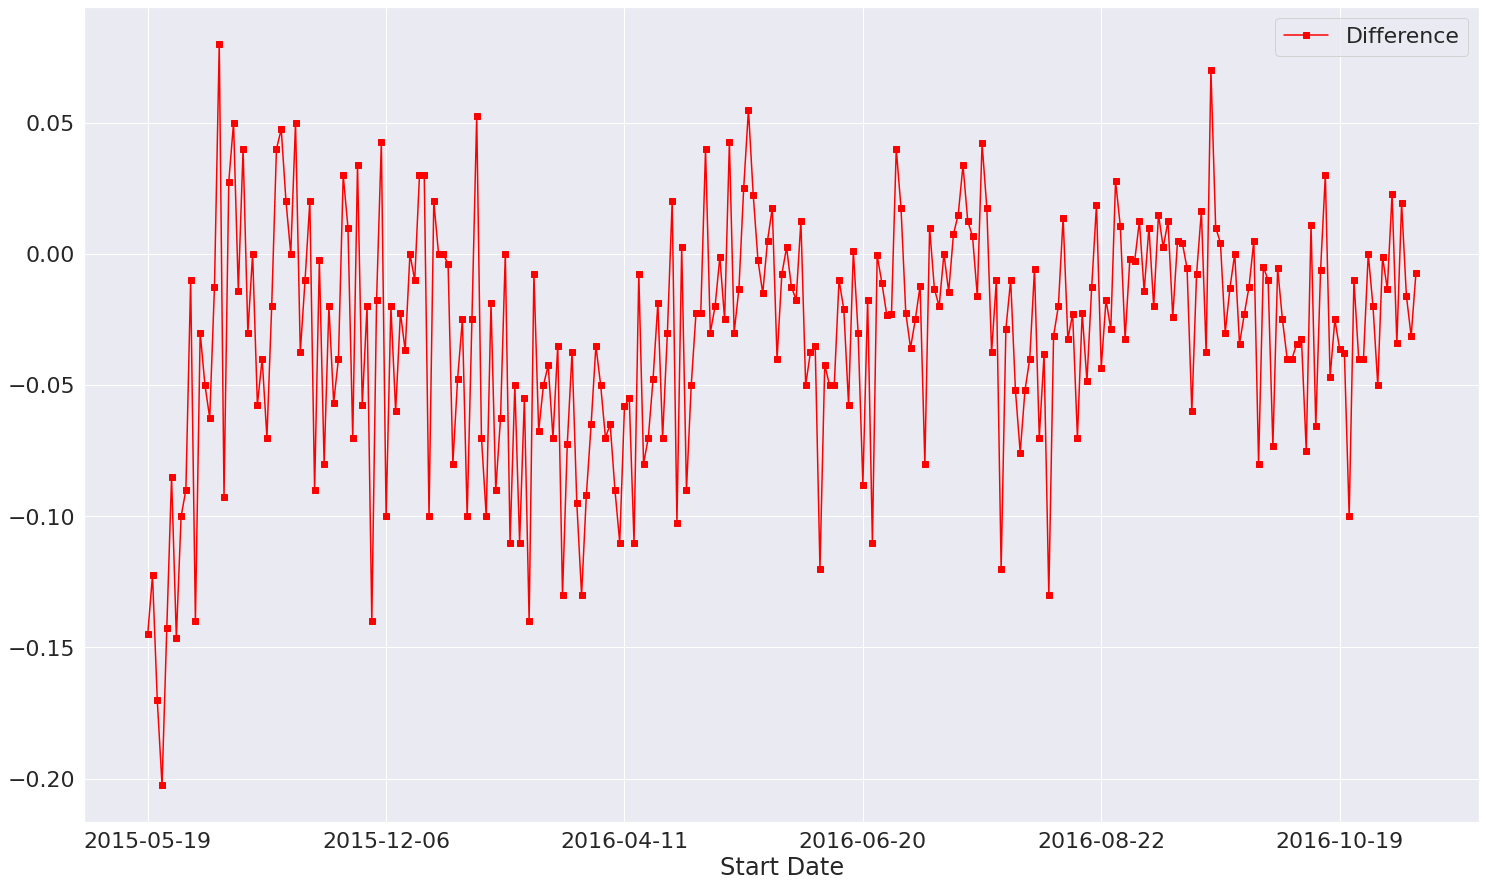

In [18]:
# Plotting the difference in polls between Trump and Clinton
poll.plot('Start Date','Difference',figsize=(25,15),marker='s',color='red')

In [24]:
# Plot marker lines on the dates of the debates and see if there is any general insight to the poll results
# The debate dates were Sept 26th, Oct 9th and Oct 19th 0f 2016

row_in=0
xlimit=[]

for date in poll['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print (min(xlimit))

row_in=0
xlimit=[]

for date in poll['Start Date']:
    if date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
print (max(xlimit))

209
262


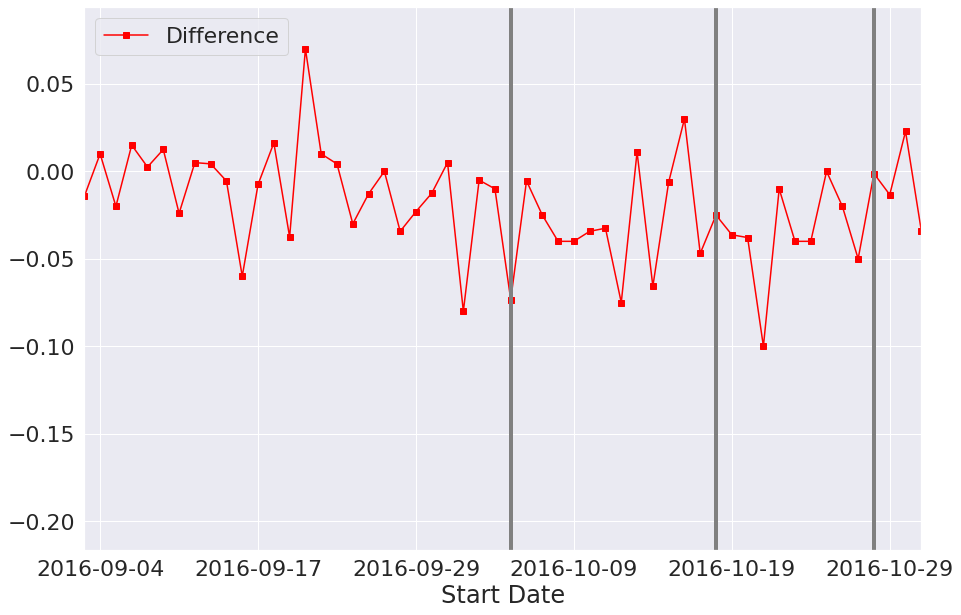

In [25]:
poll.plot('Start Date','Difference',figsize=(15,10),marker='s',color='red',xlim=(209,262))
plt.pyplot.axvline(x=209+27, linewidth=4, color='grey')
plt.pyplot.axvline(x=209+40, linewidth=4, color='grey')
plt.pyplot.axvline(x=209+50, linewidth=4, color='grey')

# Donor Data Analysis

In [ ]:
# Import Donor data

# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/Donor_Data.csv.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

donor=pd.read_csv('Donor_Data.csv')
donor.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-Mar-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559.0,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,98309998,DIPLOMAT,US GOVERNMENT,100.0,20-Feb-16,NaN,NaN,NaN,SA17A,1056862.0,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,200.0,10-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,100.0,08-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1074981,P2016


In [ ]:
# Quick Overview
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048563 entries, 0 to 1048562
Data columns (total 18 columns):
cmte_id              1048559 non-null object
cand_id              1048559 non-null object
cand_nm              1048559 non-null object
contbr_nm            1048559 non-null object
contbr_city          1048528 non-null object
contbr_st            1048559 non-null object
contbr_zip           1048387 non-null object
contbr_employer      1001612 non-null object
contbr_occupation    1039840 non-null object
contb_receipt_amt    1048559 non-null float64
contb_receipt_dt     1048559 non-null object
receipt_desc         49906 non-null object
memo_cd              60252 non-null object
memo_text            77652 non-null object
form_tp              1048559 non-null object
file_num             1048559 non-null float64
tran_id              1048559 non-null object
election_tp          1047645 non-null object
dtypes: float64(2), object(16)
memory usage: 144.0+ MB


In [ ]:
# Get a quick look at the various donation amounts
donor['contb_receipt_amt'].value_counts()

25.00      210952
50.00      194575
100.00     174995
10.00       58523
35.00       54439
            ...  
1169.00         1
52.14           1
284.50          1
2.25            1
1011.75         1
Name: contb_receipt_amt, Length: 5253, dtype: int64

In [ ]:
# Remove rows where amount is in negative
donor.drop(donor[donor.contb_receipt_amt<0].index, inplace=True)

In [ ]:
donor['contb_receipt_amt'].value_counts()

25.00      210952
50.00      194575
100.00     174995
10.00       58523
35.00       54439
            ...  
1148.40         1
79.84           1
1007.00         1
17.55           1
1601.43         1
Name: contb_receipt_amt, Length: 4157, dtype: int64

In [ ]:
# Mean and STD on donation amount

donor_mean=donor['contb_receipt_amt'].mean()
donor_std=donor['contb_receipt_amt'].std()

print("Average donation was: %0.2f with a standard deviation of: %0.2f" %(donor_mean,donor_std)) 

Average donation was: 152.98 with a standard deviation of: 490.67


In [ ]:
# Sort the data to get the top donations

top_donation=donor['contb_receipt_amt'].copy()
top_donation.sort_values(ascending=False, inplace=True)
top_donation.head(10)

150178    18000.0
383098    10800.0
437587    10800.0
856485    10800.0
856486    10800.0
394992    10800.0
836985    10800.0
552493    10800.0
797290    10800.0
859637    10800.0
Name: contb_receipt_amt, dtype: float64

In [ ]:
top_donation.value_counts(sort=True).head(10)

25.0     210952
50.0     194575
100.0    174995
10.0      58523
35.0      54439
250.0     47187
5.0       33737
500.0     22773
200.0     19504
20.0      17574
Name: contb_receipt_amt, dtype: int64

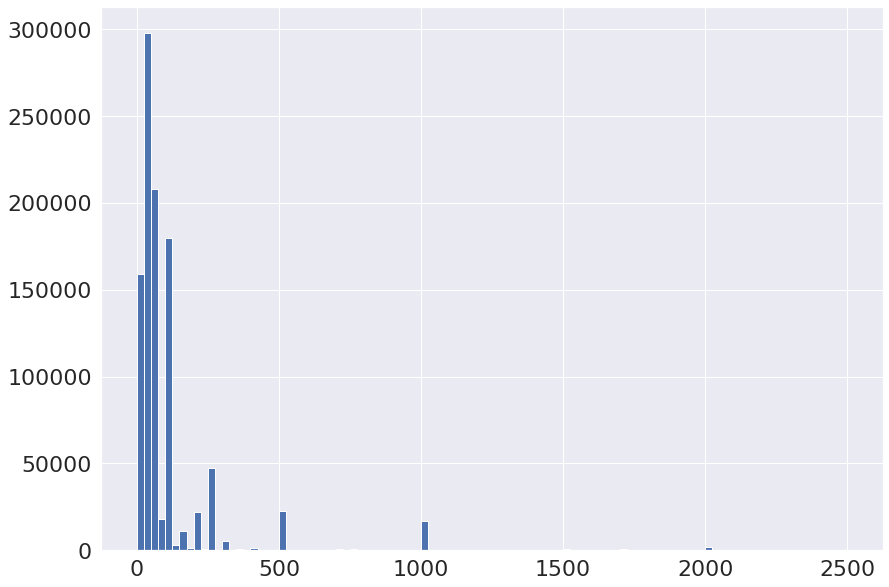

In [ ]:
# Create a series of donation limited to 2500
com_don=top_donation[top_donation<2500]
com_don.hist(bins=100)

Seperate donations by Party, in order to do this, create a new 'Party' column. Do this by starting with the candidates and their affliliation.

In [ ]:
# Grab candidate names from data
candidates=donor.cand_nm.unique()
candidates

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", nan,
       'Paul, Rand', 'Clinton, Hillary Rodham'], dtype=object)

In [ ]:
# Dictionary of party affiliation
party_map = {'Rubio, Marco': 'Republican',
           'Santorum, Richard J.': 'Republican',
           'Perry, James R. (Rick)': 'Republican',
           'Carson, Benjamin S.': 'Republican',
           "Cruz, Rafael Edward 'Ted'": 'Republican',
           'Paul, Rand': 'Republican',
           'Clinton, Hillary Rodham': 'Democrat',}
           

# Now map the party with candidate
donor['Party'] = donor.cand_nm.map(party_map)

In [ ]:
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1152124,P2016,Republican
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-Mar-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559.0,SA17.1153048,P2016,Republican
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,98309998,DIPLOMAT,US GOVERNMENT,100.0,20-Feb-16,NaN,NaN,NaN,SA17A,1056862.0,SA17.1020839,P2016,Republican
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,200.0,10-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1078677,P2016,Republican
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,100.0,08-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1074981,P2016,Republican


In [ ]:
#  Quick look a the total amounts received by each candidate
donor.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Carson, Benjamin S.          244905
Clinton, Hillary Rodham      103402
Cruz, Rafael Edward 'Ted'    541101
Paul, Rand                    32196
Perry, James R. (Rick)          875
Rubio, Marco                  99259
Santorum, Richard J.              2
Name: contb_receipt_amt, dtype: int64

In [ ]:
# Total donation received by each candidate
donor.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Carson, Benjamin S.          2.901400e+07
Clinton, Hillary Rodham      9.493156e+06
Cruz, Rafael Edward 'Ted'    6.975275e+07
Paul, Rand                   6.314863e+06
Perry, James R. (Rick)       1.189868e+06
Rubio, Marco                 4.054208e+07
Santorum, Richard J.         3.500000e+02
Name: contb_receipt_amt, dtype: float64

In [ ]:
# To make it more readable
cand_amount=donor.groupby('cand_nm')['contb_receipt_amt'].sum()
i=0
for don in cand_amount:
    print("The candidate %s raised %.0f dollars" %(cand_amount.index[i],don))
    print("\n")
    i +=1

The candidate Carson, Benjamin S. raised 29014000 dollars


The candidate Clinton, Hillary Rodham raised 9493156 dollars


The candidate Cruz, Rafael Edward 'Ted' raised 69752747 dollars


The candidate Paul, Rand raised 6314863 dollars


The candidate Perry, James R. (Rick) raised 1189868 dollars


The candidate Rubio, Marco raised 40542078 dollars


The candidate Santorum, Richard J. raised 350 dollars




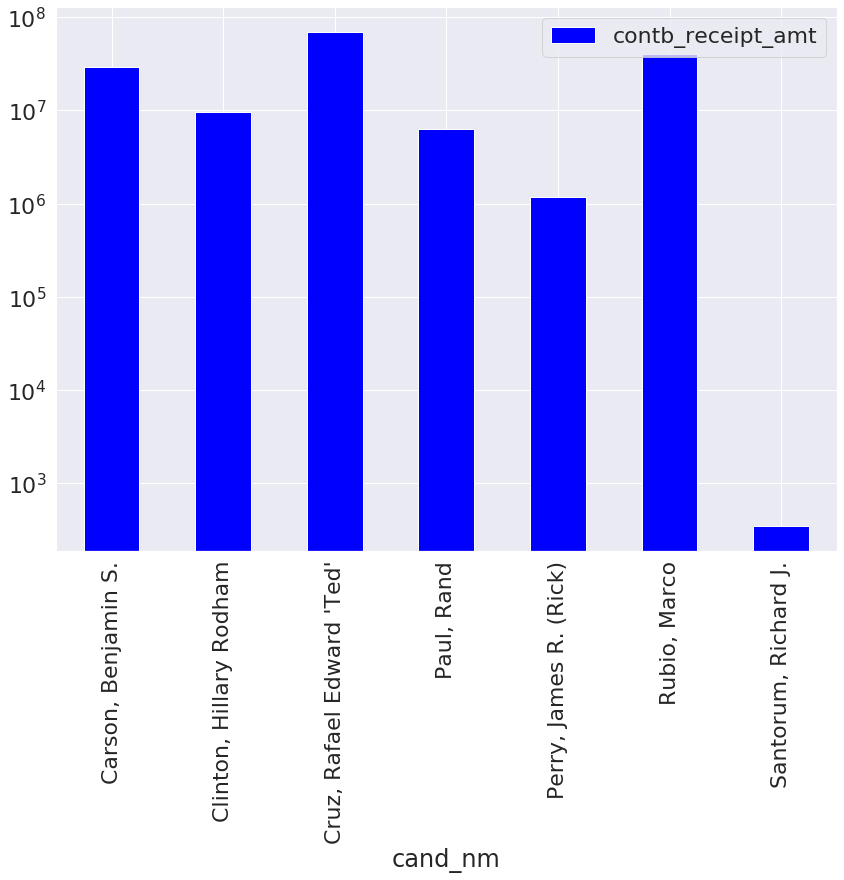

In [ ]:
# Plot graph
cand_amount.plot(kind='bar',legend=True,logy=True, color='blue')

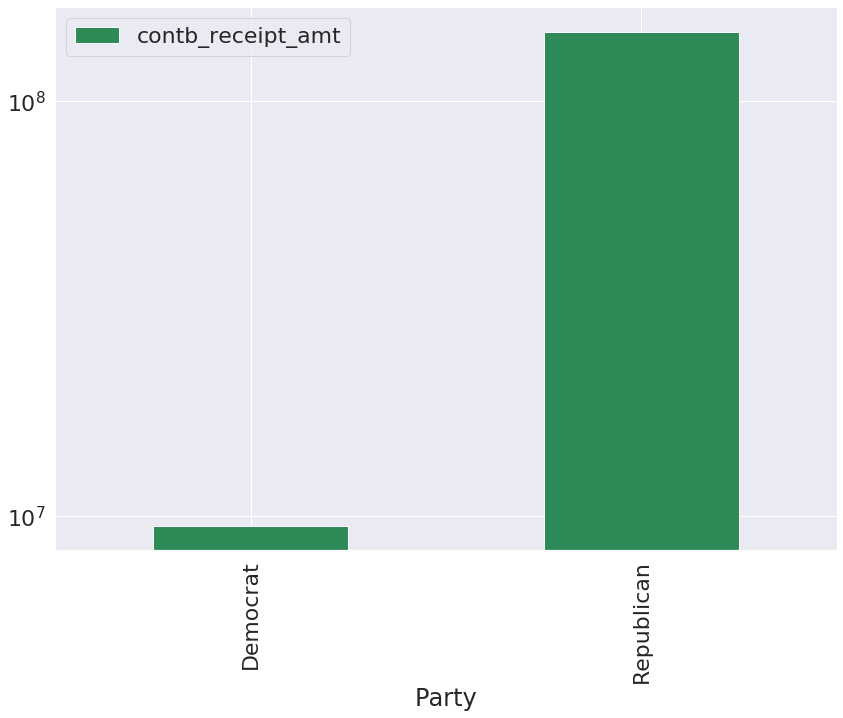

In [ ]:
# Compare Democrat versus Republican donations
donor.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',legend=True,logy=True,color='seagreen')

In [ ]:
# Occupations of dononrs
occupation=donor.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party', aggfunc='sum')
occupation

Party,Democrat,Republican
contbr_occupation,,
ARTIST,100.00,NaN
CLERGY,1000.00,NaN
EDUCATOR,110.55,NaN
"MED TECH, RAD SUPERVISOR",56.85,NaN
RETIRED,10.00,NaN
...,...,...
Z,NaN,401.6
ZACARIAS ACTUARIAL CONSULTANTS,NaN,125.0
ZGOLF FOOD & BEVERAGE SERVICES,NaN,500.0


In [ ]:
occupation = occupation[occupation.sum(1) > 1000000]

In [ ]:
occupation

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,775497.26,4.086073e+06
BUSINESS OWNER,27447.23,1.359330e+06
CEO,84206.15,2.939914e+06
CONSULTANT,181830.93,1.537787e+06
ENGINEER,73451.60,1.845427e+06
EXECUTIVE,51589.75,1.909219e+06
HOMEMAKER,204830.51,7.779608e+06
INFORMATION REQUESTED,547647.10,7.788248e+05
INFORMATION REQUESTED PER BEST EFFORTS,NaN,1.260944e+07


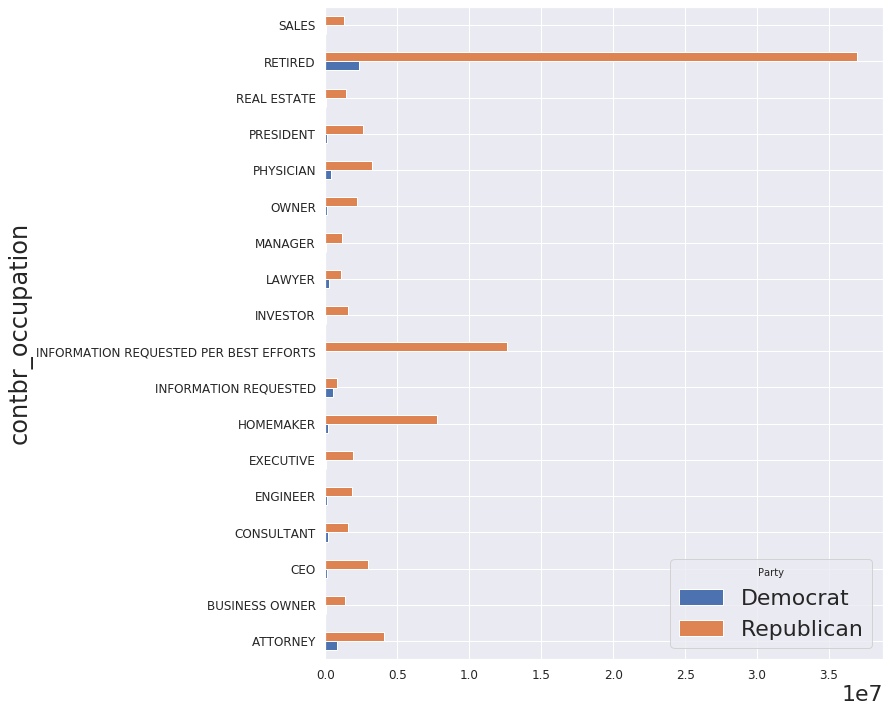

In [ ]:
# Plot occupation
occupation.plot(kind='barh',figsize=(10,12),fontsize=12)

In [ ]:
# Drop rows where there is no information
occupation.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


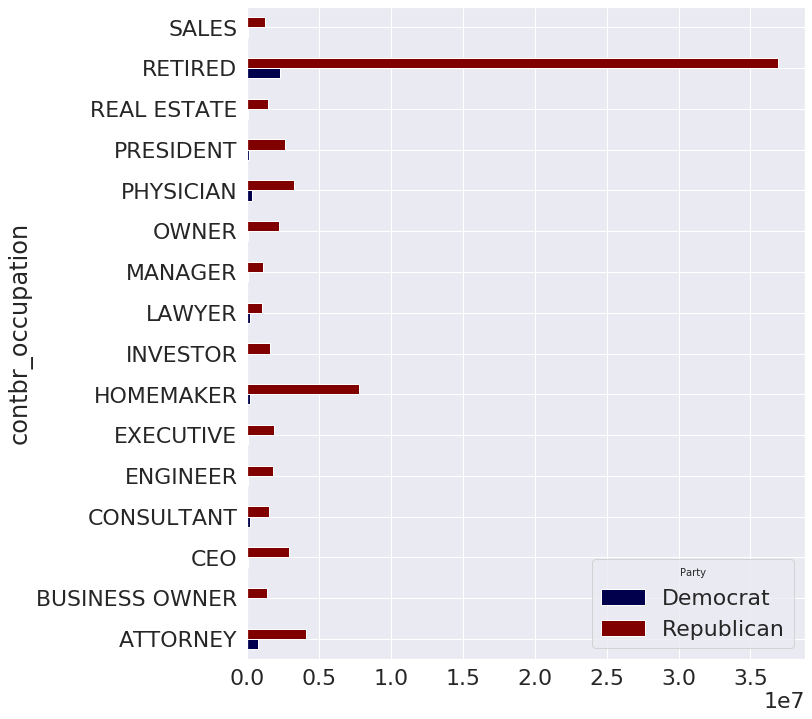

In [ ]:
occupation.plot(kind='barh',figsize=(10,12),cmap='seismic')